In [15]:
import pandas as pd
import matplotlib.pyplot as plt



In [16]:
expiry_path = "mse_days_to_expiry_unbinned.csv"
diff_path = "mse_diff_unbinned.csv"

expiry_df = pd.read_csv(expiry_path)
diff_df = pd.read_csv(diff_path)

In [17]:
expiry_df.columns

Index(['DaysToExpiry', 'ErrorFirstOrder', 'ErrorEstimate', 'ErrorSecondOrder',
       'ErrorCustom', 'ErrorCouponYield', 'CouponYield', 'PaymentFrequency'],
      dtype='object')

In [18]:
expiry_grouped = expiry_df.groupby("DaysToExpiry")[
    ['ErrorFirstOrder', 'ErrorEstimate',
       'ErrorSecondOrder', 'ErrorCustom', 'ErrorCouponYield']
].mean()

In [19]:
diff_grouped = diff_df.groupby("CouponMinusYield")[
    ['ErrorFirstOrder', 'ErrorEstimate',
       'ErrorSecondOrder', 'ErrorCustom', 'ErrorCouponYield']
].mean()

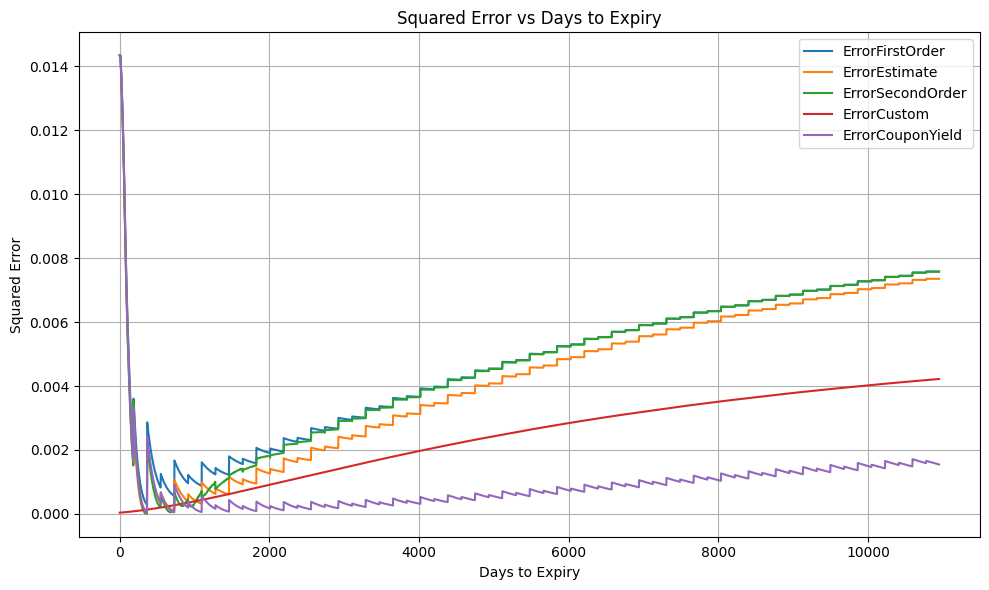

In [20]:
plt.figure(figsize=(10, 6))
error_list = ["ErrorFirstOrder", "ErrorEstimate", "ErrorSecondOrder", 'ErrorCustom', 'ErrorCouponYield']

for err in error_list:
    plt.plot(expiry_grouped.index, expiry_grouped[err], label=err)

plt.xlabel("Days to Expiry")
plt.ylabel("Squared Error")
plt.title("Squared Error vs Days to Expiry")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

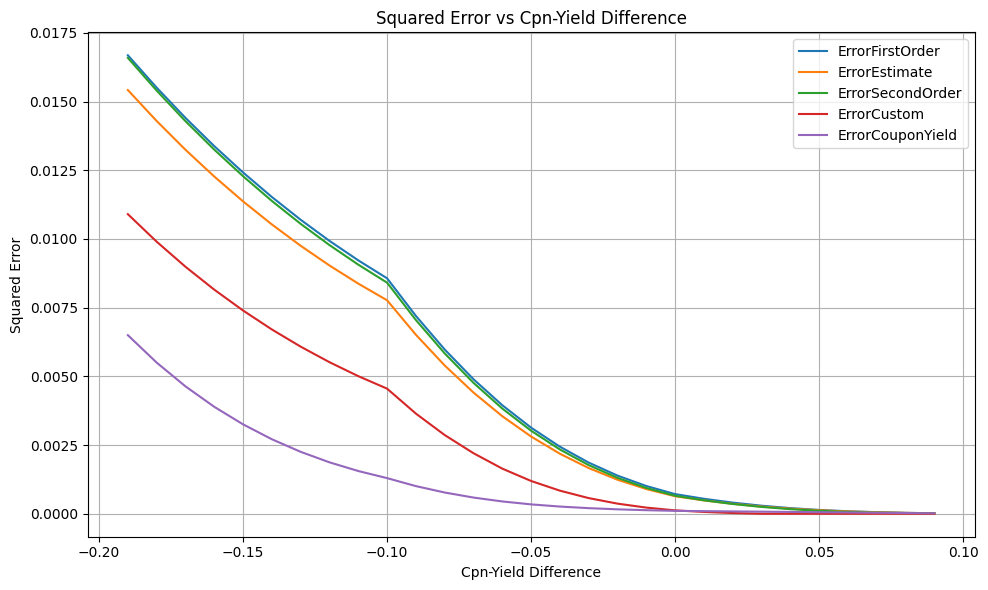

In [21]:
plt.figure(figsize=(10, 6))
error_list = ["ErrorFirstOrder", "ErrorEstimate", "ErrorSecondOrder", 'ErrorCustom', 'ErrorCouponYield']

for err in error_list:
    plt.plot(diff_grouped.index, diff_grouped[err], label=err)

plt.xlabel("Cpn-Yield Difference")
plt.ylabel("Squared Error")
plt.title("Squared Error vs Cpn-Yield Difference")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()